In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import scipy.stats as st
import seaborn as sns
from scipy.stats import norm
import matplotlib
import ipas

In [2]:
f = open('../instance_files/instance_iceice_rand_rall_major_depth', 'rb')
results = pickle.load(f)
agg_as_iceice_rand, agg_bs_iceice_rand, agg_cs_iceice_rand, phi2Ds_iceice_rand, cplxs_iceice_rand, dds_iceice_rand= \
                results['agg_as'], results['agg_bs'], results['agg_cs'], results['phi2Ds'], results['cplxs'], results['dds']
f.close()

f = open('../instance_files/instance_iceice_flat_rall_major_depth', 'rb')
results = pickle.load(f)
agg_as_iceice_flat, agg_bs_iceice_flat, agg_cs_iceice_flat, phi2Ds_iceice_flat, cplxs_iceice_flat, dds_iceice_flat= \
                results['agg_as'], results['agg_bs'], results['agg_cs'], results['phi2Ds'], results['cplxs'], results['dds']
f.close()

f = open('../instance_files/instance_db_iceagg_rand', 'rb')
results = pickle.load(f)
agg_as_iceagg_rand, agg_bs_iceagg_rand, agg_cs_iceagg_rand, phi2Ds_iceagg_rand, cplxs_iceagg_rand, dds_iceagg_rand= \
                results['agg_as'], results['agg_bs'], results['agg_cs'], results['phi2Ds'], results['cplxs'], results['dds']
f.close()
f = open('../instance_files/pulled_clusters_iceagg_rand', 'rb')
pulled_clus_iceagg_rand = pickle.load(f)
f.close()

f = open('../instance_files/instance_db_iceagg_flat', 'rb')
results = pickle.load(f)
agg_as_iceagg_flat, agg_bs_iceagg_flat, agg_cs_iceagg_flat, phi2Ds_iceagg_flat, cplxs_iceagg_flat, dds_iceagg_flat= \
                results['agg_as'], results['agg_bs'], results['agg_cs'], results['phi2Ds'], results['cplxs'], results['dds']
f.close()
f = open('../instance_files/pulled_clusters_iceagg_flat', 'rb')
pulled_clus_iceagg_flat = pickle.load(f)
f.close()

f = open('../instance_files/instance_db_aggagg_rand', 'rb')
results = pickle.load(f)
agg_as_aggagg_rand, agg_bs_aggagg_rand, agg_cs_aggagg_rand, phi2Ds_aggagg_rand, cplxs_aggagg_rand, dds_aggagg_rand= \
                results['agg_as'], results['agg_bs'], results['agg_cs'], results['phi2Ds'], results['cplxs'], results['dds']
f.close()
f = open('../instance_files/pulled_clusters_aggagg_rand', 'rb')
pulled_clus_aggagg_rand = pickle.load(f)
f.close()

f = open('../instance_files/instance_db_aggagg_flat', 'rb')
results = pickle.load(f)
agg_as_aggagg_flat, agg_bs_aggagg_flat, agg_cs_aggagg_flat, phi2Ds_aggagg_flat, cplxs_aggagg_flat, dds_aggagg_flat= \
                results['agg_as'], results['agg_bs'], results['agg_cs'], results['phi2Ds'], results['cplxs'], results['dds']
f.close()
f = open('../instance_files/pulled_clusters_aggagg_flat', 'rb')
pulled_clus_aggagg_flat = pickle.load(f)
f.close()

f = open('../instance_files/instance_iceagg_flat_r10_compareDunnavan1', 'rb')
agg_as_Ntot_flat, agg_bs_Ntot_flat, agg_cs_Ntot_flat, phi2Ds, cplxs, dds_Ntot_flat = pickle.load(f)
f.close()

f = open('../instance_files/instance_iceagg_rand_r10_compareDunnavan', 'rb')
agg_as_Ntot_rand, agg_bs_Ntot_rand, agg_cs_Ntot_rand, phi2Ds, cplxs, dds_Ntot_rand, major_ax_zs, depths = pickle.load(f)
f.close()


In [17]:
np.shape(dds_Ntot_rand)

(5, 1, 300, 99)

In [3]:
large = 20; med = 16; small = 14
params = {'axes.titlesize': med,
          'legend.fontsize': small,
          'figure.figsize': (7,7),
          'axes.labelsize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large,
          "font.family": "serif"}
plt.rcParams.update(params)

In [4]:
#RAND
print(np.shape(dds_iceice_rand))
print(np.shape(dds_iceagg_rand))
print(np.shape(dds_aggagg_rand))

#FLAT
print(np.shape(dds_iceice_flat))
print(np.shape(dds_iceagg_flat))
print(np.shape(dds_aggagg_flat))


(20, 28, 300)
(20, 20, 300)
(20, 20, 300)
(20, 28, 300)
(20, 20, 300)
(20, 20, 300)


In [ ]:
#RAND
ct_iceice_rand = np.sum(dds_iceice_rand >= 0)
ct_iceagg_rand = np.sum(dds_iceagg_rand >= 0)
ct_aggagg_rand = np.sum(dds_aggagg_rand >= 0)
print(ct_iceice_rand, ct_iceagg_rand, ct_aggagg_rand)

#FLAT
ct_iceice_flat = np.sum(dds_iceice_flat >= 0)
ct_iceagg_flat = np.sum(dds_iceagg_flat >= 0)
ct_aggagg_flat = np.sum(dds_aggagg_flat >= 0)
print(ct_iceice_flat, ct_iceagg_flat, ct_aggagg_flat)


In [5]:
perc_upper=.99
perc_lower=.01
print('RAND')
dds_aggagg_rand_ext= dds_aggagg_rand[(dds_aggagg_rand<np.quantile(dds_aggagg_rand, perc_upper)) & (dds_aggagg_rand>np.quantile(dds_aggagg_rand, perc_lower))]
dds_iceagg_rand_ext= dds_iceagg_rand[(dds_iceagg_rand<np.quantile(dds_iceagg_rand, perc_upper)) & (dds_iceagg_rand>np.quantile(dds_iceagg_rand, perc_lower))]
dds_iceice_rand_ext= dds_iceice_rand[(dds_iceice_rand<np.quantile(dds_iceice_rand, perc_upper)) & (dds_iceice_rand>np.quantile(dds_iceice_rand, perc_lower))]

print(np.min(dds_iceice_rand_ext),np.max(dds_iceice_rand_ext)) 
print(np.min(dds_iceagg_rand_ext),np.max(dds_iceagg_rand_ext))
print(np.min(dds_aggagg_rand_ext),np.max(dds_aggagg_rand_ext))

print('FLAT')
dds_aggagg_flat_ext= dds_aggagg_flat[(dds_aggagg_flat<np.quantile(dds_aggagg_flat, perc_upper)) & (dds_aggagg_flat>np.quantile(dds_aggagg_flat, perc_lower))]
dds_iceagg_flat_ext= dds_iceagg_flat[(dds_iceagg_flat<np.quantile(dds_iceagg_flat, perc_upper)) & (dds_iceagg_flat>np.quantile(dds_iceagg_flat, perc_lower))]
dds_iceice_flat_ext= dds_iceice_flat[(dds_iceice_flat<np.quantile(dds_iceice_flat, perc_upper)) & (dds_iceice_flat>np.quantile(dds_iceice_flat, perc_lower))]

print(np.min(dds_iceice_flat_ext),np.max(dds_iceice_flat_ext)) 
print(np.min(dds_iceagg_flat_ext),np.max(dds_iceagg_flat_ext))
print(np.min(dds_aggagg_flat_ext),np.max(dds_aggagg_flat_ext))

RAND
-0.9977765399045317 -0.1273537432750034
-0.7165844493232424 0.5225738784630626
-0.8015943182587468 0.16763670246685616
FLAT
-0.9842660412295803 0.15043276149048543
-0.6840701081236058 0.357833569652692
-0.7316683464829719 0.36872029386906474


In [ ]:
# Iterate through collections
data_list = [dds_aggagg_flat_ext, dds_iceagg_flat_ext, dds_iceice_flat_ext]
label = ['A-A', 'M-A', 'M-M']
for c,coll in enumerate(data_list):
    # Draw the density plot
    sns.distplot(coll, hist = True, kde = True,
                 kde_kws = {'linewidth': 3, 'shade':True},
                 label = label[c])
plt.gca().set(xlabel='Density Change', ylabel='Density', title='Quasi-Horizontal Orientation');
plt.axvline(x=0.0, color='grey', linestyle='--')
plt.xlim(-1.2, 0.6)
#plt.yscale('log')
#plt.ylim(1.0, 100)
plt.legend()


In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,5))
plt.subplots_adjust(wspace=0, hspace=0)
params = {'legend.fontsize': 11,
          'legend.handlelength': 1}
plt.rcParams.update(params)

perc_upper=.995
perc_lower=.005
# Iterate through collections
data_list = [dds_aggagg_rand_ext, dds_iceagg_rand_ext, dds_iceice_rand_ext]
label = ['AGG-AGG', 'MON-AGG', 'MON-MON']
for c,coll in enumerate(data_list):
    # Draw the density plot
    sns.distplot(coll, hist = True, kde = True, ax=ax1,
                 kde_kws = {'linewidth': 3, 'shade':True},
                 label = label[c])
ax1.set_xlabel('Density Change')
ax1.set_ylabel('Probability Density')
ax1.set_title('Random Orientation')
ax1.axvline(x=0.0, color='grey', linestyle='--')
ax1.set_xlim(-1.2, 0.6)
#ax1.set_yscale('log')
ax1.set_ylim(0, 6)
ax1.legend(loc='upper left')

# Iterate through collections
data_list = [dds_aggagg_flat_ext, dds_iceagg_flat_ext, dds_iceice_flat_ext]

label = ['AGG-AGG', 'MON-AGG', 'MON-MON']
for c,coll in enumerate(data_list):
    # Draw the density plot
    sns.distplot(coll, hist = True, kde = True, ax=ax2,
                 kde_kws = {'linewidth': 3, 'shade': True},
                 label = label[c])
plt.gca().set(xlabel='Density Change', title='Quasi-Horizontal Orientation');
plt.axvline(x=0.0, color='grey', linestyle='--')
plt.xlim(-1.2, 0.6)
#plt.yscale('log')
plt.legend()
plt.ylim(0, 6)
plt.savefig('../plots/dd_subplot_allcollections.pdf', format='pdf', dpi=300)

Text(0.5, 1.0, 'Quasi-Horizontal Orientation')

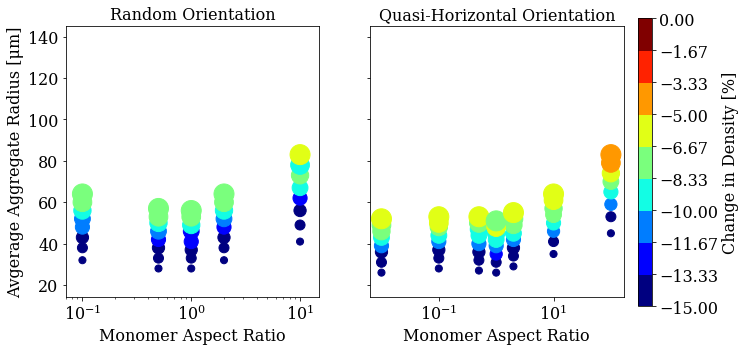

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,5))
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(-15, 0.0, 10)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
n_perc = dds_Ntot_rand*100
phiarr = [0.01, 0.1, 0.5, 1.0, 2.0, 10.,  100.]
Ns = np.arange(9)
for N in Ns:
    agg_r = np.round(np.power((np.power(np.mean(agg_as_Ntot_rand[:,0,:,N], axis=1),2)*np.mean(agg_cs_Ntot_rand[:,0,:,N], axis=1)),(1./3.)))
    
    ax1.scatter(phiarr, agg_r, c=cmap(norm(np.mean(dds_Ntot_rand_perc[:,0,:,N], axis=1))), s=N*50)
ax1.set_xlim(0.07, 15)
ax1.set_xscale('log')
ax1.set_ylabel('Avgerage Aggregate Radius [\u03BCm]')
ax1.set_xlabel('Monomer Aspect Ratio')
ax1.set_title('Random Orientation')
cb = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
cax = fig.add_axes([0.92,0.1,0.02,0.8])  #[left, bottom, width, height] 
cbar = plt.colorbar(cb, cax=cax)
cbar.set_label('Change in Density [%]');

dds_Ntot_flat_perc = dds_Ntot_flat*100
for N in Ns:
    agg_r = np.round(np.power((np.power(np.mean(agg_as_Ntot_flat[:,0,:,N], axis=1),2)*np.mean(agg_cs_Ntot_flat[:,0,:,N], axis=1)),(1./3.)))
    ax2.scatter(phiarr, agg_r, c=cmap(norm(np.mean(dds_Ntot_flat_perc[:,0,:,N], axis=1))), s=N*50)
ax2.set_xlim(0.07, 15)
ax2.set_xscale('log')
ax2.set_xlabel('Monomer Aspect Ratio')
ax2.set_title('Quasi-Horizontal Orientation')


In [15]:
np.shape(dds_Ntot_rand), np.shape(dds_Ntot_flat)

((7, 1, 300, 99), (7, 1, 300, 99))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

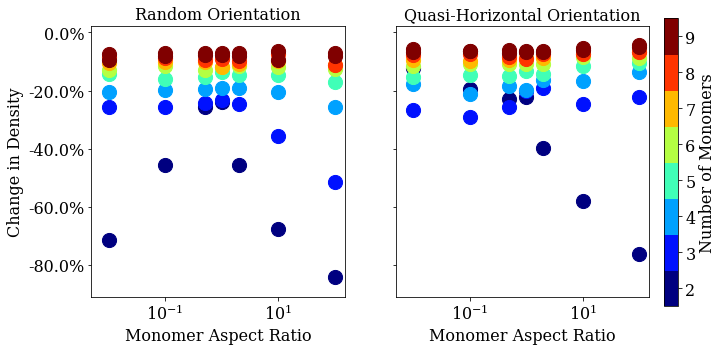

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,5))

cmap = plt.cm.jet
norm = matplotlib.colors.Normalize(vmin=0, vmax=10)
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]

# create the new map
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0, 8, 9)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

phiarr = [0.01, 0.1, 0.5, 1.0, 2.0, 10., 100.]
Ns = np.arange(9)
for N in Ns:
    ax1.scatter(phiarr, np.mean(dds_Ntot_rand[:,0,:,N], axis=1), c=cmap(norm(N),8), s=200)
ax1.set_xlim(0.005, 150)
#ax1.set_ylim(-0.15, 0.0)
vals = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.1%}'.format(x) for x in vals])
ax1.set_xscale('log')
ax1.set_ylabel('Change in Density')
ax1.set_title('Random Orientation')
ax1.set_xlabel('Monomer Aspect Ratio')
cb = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
cax = fig.add_axes([0.92,0.1,0.02,0.8])  #[left, bottom, width, height] 
cbar = plt.colorbar(cb, ticks=np.linspace(0, 9, 10) + .5, format='%d', cax=cax)
cbar.set_ticklabels([2,3,4,5,6,7,8,9,10])
cbar.set_label('Number of Monomers');

for N in Ns:
    ax2.scatter(phiarr, np.mean(dds_Ntot_flat[:,0,:,N], axis=1), c=cmap(norm(N),8), s=200)
ax2.set_xlim(0.005, 150)
#ax2.set_ylim(-0.15, 0.0)
ax2.set_xscale('log')
ax2.set_title('Quasi-Horizontal Orientation')
ax2.set_xlabel('Monomer Aspect Ratio')
tick_locs = np.linspace(0, Ns)


In [ ]:
binwidth = 0.1
mindata = min(np.amin(dds_iceice_rand), np.amin(dds_iceagg_rand), np.amin(dds_aggagg_rand))
maxdata = max(np.amax(dds_iceice_rand), np.amax(dds_iceagg_rand), np.amax(dds_aggagg_rand))
bins=np.arange(mindata, maxdata + binwidth, binwidth)
_, n,bins = plt.hist(dds_aggagg_rand.ravel(), color='blue', alpha=0.5, bins=100, label='agg-agg', density=True)
_, n,bins = plt.hist(dds_iceagg_rand.ravel(), color='orange', alpha=0.5, bins=100, label='ice-agg', density=True)
_, n,bins = plt.hist(dds_iceice_rand.ravel(), color='green', alpha=0.5, bins=100, label='ice-ice', density=True)

plt.gca().set(xlabel='Density Change', ylabel='Frequency');
plt.xlim(-1., 0.8)
plt.legend()
plt.savefig('../plots/dd_rand_hist.png')

In [ ]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(0, len(labels)))
    ax.set_xticklabels(labels, fontsize=14)
    ax.tick_params(axis='y', which='major', labelsize=14)
    ax.set_xlabel('Collection Method', fontsize=16)
    ax.set_title('Quasi-Horizontal Orientation', fontsize=16)
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
colors=['g','b','r']
dataset = [dds_iceice_flat.ravel(), dds_iceagg_flat.ravel(), dds_aggagg_flat.ravel()]
for c, data in enumerate(dataset): 
    data= data[(data<np.quantile(data, .95)) & (data>np.quantile(data, .05))]
    print(c)
    if c == 2:
        points = 1000
    else:
        points = 100
    parts = ax.violinplot(data,showmeans=False, showmedians=False,
            showextrema=False, positions=[c], widths =0.8)
    for pc in parts['bodies']:
        pc.set_facecolor(colors[c])
        pc.set_edgecolor('black')
        pc.set_alpha(1)

    quartile1, median, quartile3 = np.percentile(data, [25, 50, 75])
    ax.scatter(c, median, marker='o', color='white', s=30, zorder=3)
    whiskers = np.array([adjacent_values(data, quartile1, quartile3)])
    whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]
    ax.vlines(c, quartile1, quartile3, color='k', linestyle='-', lw=5)
    ax.vlines(c, whiskersMin, whiskersMax, color='k', linestyle='-', lw=5)
    
plt.axhline(y=0.0, color='k', linestyle='--', alpha = 0.5)
ax.set_ylabel('Change in Density', fontsize=16)
#ax.set_ylim(-0.6, 0.5)
# set style for the axes
labels = ['ice-ice', 'ice-agg', 'agg-agg']
set_axis_style(ax, labels)
plt.show()

In [ ]:
agg_bs_iceagg_flat.shape

In [ ]:
fig, axes = plt.subplots(2,5, figsize=(16,5), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
axs = axes.ravel()
phi_ba_iceagg_flat = agg_bs_iceagg_flat/agg_as_iceagg_flat
phi_ca_iceagg_flat = agg_cs_iceagg_flat/agg_as_iceagg_flat
phi_ba_iceagg_rand = agg_bs_iceagg_rand/agg_as_iceagg_rand
phi_ca_iceagg_rand = agg_cs_iceagg_rand/agg_as_iceagg_rand

phi_ba_aggagg_flat = agg_bs_aggagg_flat/agg_as_aggagg_flat
phi_ca_aggagg_flat = agg_cs_aggagg_flat/agg_as_aggagg_flat
phi_ba_aggagg_rand = agg_bs_aggagg_rand/agg_as_aggagg_rand
phi_ca_aggagg_rand = agg_cs_aggagg_rand/agg_as_aggagg_rand

phi_bins_rand=[0.00548, 0.273, 0.327, 0.359, 0.384, 0.405,
 0.424, 0.441, 0.458, 0.474, 0.490, 0.506,
 0.522, 0.539, 0.557, 0.576, 0.598, 0.623,
 0.655, 0.701, 0.975]
phi_bins_flat=[0.005, 0.027, 0.039, 0.054, 0.072, 0.095,
 0.121, 0.151, 0.187, 0.229, 0.279, 0.337,
 0.398, 0.452, 0.498, 0.538, 0.576, 0.613,
 0.655, 0.710, 0.977]
print('phi \t oblates\t prolates \tprolates majority?')

r=9
i=0
phios = [0,3,5,7,9,11,13,15,17,19]
for phio in phios:
    iceagg = np.vstack([phi_ba_iceagg_flat[phio,r,:], phi_ca_iceagg_flat[phio,r,:]])
    kde_iceagg = st.gaussian_kde(iceagg)    
    aggagg = np.vstack([phi_ba_aggagg_flat[phio,r,:], phi_ca_aggagg_flat[phio,r,:]])
    kde_aggagg = st.gaussian_kde(aggagg)

    oblates = 0
    prolates = 0
    for l in range(300):
        if agg_bs_iceagg_rand[phio,r,l] - agg_cs_iceagg_rand[phio,r,l] <= agg_as_iceagg_rand[phio,r,l] - agg_bs_iceagg_rand[phio,r,l]:
            prolates +=1
        else:
            oblates+=1
    if prolates>oblates:
        bigger = 'True'
    else:
        bigger = ' '

    print('%3.1f, %10.2f, %15.2f, %15s' %(phio, (oblates/300)*100, (prolates/300)*100, bigger))
#     oblates = 0
#     prolates = 0
#     for l in range(300):
#         if agg_bs_iceagg_rand[phio,r,l] - agg_cs_iceagg_rand[phio,r,l] <= agg_as_iceagg_rand[phio,r,l] - agg_bs_iceagg_rand[phio,r,l]:
#             prolates +=1
#         else:
#             oblates+=1
#     if prolates>oblates:
#         bigger = 'True'
#     else:
#         bigger = ' '

#     print('%3.1f, %10.2f, %15.2f, %15s' %(phio, (oblates/300)*100, (prolates/300)*100, bigger))
    
    

    # evaluate on a regular grid
    xgrid = np.arange(0.0, 1.01, 0.01)
    ygrid = np.arange(0.0, 1.01, 0.01)

    Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
    Z_iceagg = kde_iceagg.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
    Z_iceagg = Z_iceagg.reshape(Xgrid.shape)
    Z_aggagg = kde_aggagg.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
    Z_aggagg = Z_aggagg.reshape(Xgrid.shape)

    axs[i].contour(Z_iceagg, cmap='Blues', vmin=1, vmax=10)
    axs[i].contour(Z_aggagg, cmap='Reds', vmin=1, vmax=10)

    #modes iceagg
    modes = np.where(Z_iceagg==np.max(Z_iceagg))
    #print(float(modes[1]/100), float(modes[0]/100))
    axs[i].plot(float(modes[1]), float(modes[0]), 'bo')

    #modes aggagg
    modes = np.where(Z_aggagg==np.max(Z_aggagg))
    #print(float(modes[1]/100), float(modes[0]/100))

    
    axs[i].plot(float(modes[1]), float(modes[0]), 'ro')

    axs[i].plot(np.linspace(0.0,100,10),np.linspace(0.0,100,10), 'gray', '--', zorder=2)
    axs[i].set_xticks([0,20,40,60,80,100])
    axs[i].set_yticks([0,20,40,60,80,100])
    #axs[i].set_xticklabels([])
    axs[i].set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], rotation=50)
    axs[i].set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    axs[i].grid(which='major', alpha=0.5)

    axs[i].set_title('[%.3f-%.3f]' %(phi_bins_flat[phio], phi_bins_flat[phio+1]), fontfamily='serif')
    #textstr = ('[%.3f-%.3f]' %(minpulled, maxpulled))
    #axs[i].text(8.0, 90.0, textstr, fontsize=14, fontfamily='serif')
    i+=1
m = plt.cm.ScalarMappable(cmap='Reds')
m.set_array(Z_aggagg)

c = plt.cm.ScalarMappable(cmap='Blues')
c.set_array(Z_iceagg)

cbar=plt.colorbar(m, boundaries=np.linspace(0, 50, 11),ax=axes.ravel().tolist(), aspect=20, orientation='vertical',pad=-.06)
plt.colorbar(c, boundaries=np.linspace(0, 30, 11),ax=axes.ravel().tolist(), aspect=20, orientation='vertical',pad=0.04)
#fig.savefig('../plots/phi_pdfs_ba_ca_flat.png', format='png', dpi=300);


In [ ]:
phio1 = np.arange(20)
phio2 = np.arange(20)
hold_clusters1 = np.(phio1,20,300)
hold_clusters2 = np.random.rand(phio2,20,300)
together = np.append(hold_clusters1, hold_clusters2)
print(together.reshape(20,20,600).shape)


12 0
12 3
13 5
13 7
14 9
15 11
15 13
15 15
15 17
15 19


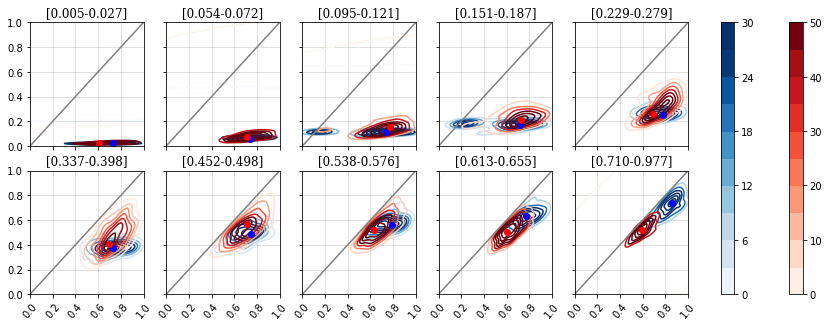

In [11]:
fig, axes = plt.subplots(2,5, figsize=(16,5), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
axs = axes.ravel()
phi_ba_iceagg_flat = agg_bs_iceagg_flat/agg_as_iceagg_flat
phi_ca_iceagg_flat = agg_cs_iceagg_flat/agg_as_iceagg_flat
phi_ba_iceagg_rand = agg_bs_iceagg_rand/agg_as_iceagg_rand
phi_ca_iceagg_rand = agg_cs_iceagg_rand/agg_as_iceagg_rand

phi_ba_aggagg_flat = agg_bs_aggagg_flat/agg_as_aggagg_flat
phi_ca_aggagg_flat = agg_cs_aggagg_flat/agg_as_aggagg_flat
phi_ba_aggagg_rand = agg_bs_aggagg_rand/agg_as_aggagg_rand
phi_ca_aggagg_rand = agg_cs_aggagg_rand/agg_as_aggagg_rand


phi_bins_rand=[0.00548, 0.273, 0.327, 0.359, 0.384, 0.405,
 0.424, 0.441, 0.458, 0.474, 0.490, 0.506,
 0.522, 0.539, 0.557, 0.576, 0.598, 0.623,
 0.655, 0.701, 0.975]
phi_bins_flat=[0.005, 0.027, 0.039, 0.054, 0.072, 0.095,
 0.121, 0.151, 0.187, 0.229, 0.279, 0.337,
 0.398, 0.452, 0.498, 0.538, 0.576, 0.613,
 0.655, 0.710, 0.977]

#r=9
rs = [12, 12, 13, 13, 14, 15,15,15,15,15,15,15,14,13,12,11,11,10,10,10]
i=0
phios = [0,3,5,7,9,11,13,15,17,19]
for c,phio in enumerate(phios):    
    r=rs[c]
    print(r, phio)
#     cs_aggagg_flat = [i.c for i in pulled_clus_aggagg_flat[phio,10,:]]
#     as_aggagg_flat = [i.a for i in pulled_clus_aggagg_flat[phio,10,:]]
#     phi_aggagg_flat = np.divide(cs_aggagg_flat, as_aggagg_flat)
    
    maxpulled=max([l.phi for l in pulled_clus_iceagg_flat[phio,r,:]])
    minpulled=np.amin([l.phi for l in pulled_clus_iceagg_flat[phio,r,:]])

    iceagg = np.vstack([phi_ba_iceagg_flat[phio,r,:], phi_ca_iceagg_flat[phio,r,:]])
    kde_iceagg = st.gaussian_kde(iceagg)    
    aggagg = np.vstack([phi_ba_aggagg_flat[phio,r,:], phi_ca_aggagg_flat[phio,r,:]])
    kde_aggagg = st.gaussian_kde(aggagg)

    # evaluate on a regular grid
    xgrid = np.arange(0.0, 1.01, 0.01)
    ygrid = np.arange(0.0, 1.01, 0.01)
    Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
    Z_iceagg = kde_iceagg.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
    Z_iceagg = Z_iceagg.reshape(Xgrid.shape)
    Z_aggagg = kde_aggagg.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
    Z_aggagg = Z_aggagg.reshape(Xgrid.shape)

    axs[i].contour(Z_iceagg, cmap='Blues', vmin=1, vmax=10)
    axs[i].contour(Z_aggagg, cmap='Reds', vmin=1, vmax=10)

    #modes iceagg
    modes = np.where(Z_iceagg==np.max(Z_iceagg))
    axs[i].plot(float(modes[1]), float(modes[0]), 'bo')
    #modes aggagg
    modes = np.where(Z_aggagg==np.max(Z_aggagg))
    axs[i].plot(float(modes[1]), float(modes[0]), 'ro')

    axs[i].plot(np.linspace(0.0,100,10),np.linspace(0.0,100,10), 'gray', '--', zorder=2)
    axs[i].set_xticks([0,20,40,60,80,100])
    axs[i].set_yticks([0,20,40,60,80,100])
    #axs[i].set_xticklabels([])
    axs[i].set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], rotation=50)
    axs[i].set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    axs[i].grid(which='major', alpha=0.5)

    axs[i].set_title('[%.3f-%.3f]' %(phi_bins_flat[phio], phi_bins_flat[phio+1]),fontfamily='serif')
    
    i+=1
m = plt.cm.ScalarMappable(cmap='Reds')
m.set_array(Z_aggagg)

c = plt.cm.ScalarMappable(cmap='Blues')
c.set_array(Z_iceagg)

cbar=plt.colorbar(m, boundaries=np.linspace(0, 50, 11),ax=axes.ravel().tolist(), aspect=20, orientation='vertical',pad=-.06)
plt.colorbar(c, boundaries=np.linspace(0, 30, 11),ax=axes.ravel().tolist(), aspect=20, orientation='vertical',pad=0.04)
#fig.savefig('../plots/phi_pdfs_ba_ca_rand.png', format='png', dpi=300);


In [21]:
len(phi_ba_iceagg_flat[5,13,:][phi_ba_iceagg_flat[5,13,:]< 0.4])

65

In [16]:
len(phi_ba_iceagg_flat[7,13,:][phi_ba_iceagg_flat[7,13,:]> 0.2])

286